## This is an example of Bayeslian  linear regression with various basis functions

Implement a Python code for Bayesian linear regression with basis functions, i.e.,

$$p(y|x, w)=\mathcal{N}(y|w^{T}\phi(x), \alpha^{-1}I), p(w)=\mathcal{N}(w | 0, \beta^{-1}I), \alpha=5, \beta=0.1$$

We're going to generate a set of $N$ noisy observations by sampling:

$$y(x)=e^{x}\sin(2\pi x)+\epsilon, \epsilon\sim \mathcal{N}(0,0.5),x\in[0,2]$$

on a latin hypercube grid, and compute the MLE and MAP estimates for the weights $w$ using different types and numbers of features $\phi(x)$:

- Identity basis: $\phi(x)=x$

- Monomial bases: $\phi(x)=\{1,x,x^2,x^3,...,x^M\}$

- Fourier basis: $\phi(x)=\{0, 1, \sin(\pi x), \cos(\pi x), \sin(2\pi x), \cos(2\pi x),...,\sin(M\pi x), cos(M\pi x)\}$ (this case has a total of $2M$ features)

- Legendre basis: Can be computed using the built-in NumPy function

For the case $N=500$, $M=8$, plot the data, the mean predictions corresponding to the MLE and MAP estimates for $w$, and 500 samples from the predictive posterior distribution. Experiment with changing $N$ and $M$ and provide some qualitative commends on the prediction accuracy. Which set of features do you think works best for this data-set and why? Also for the name $N = 500$ and $M = 4$, plot the features corresponding to each basis.

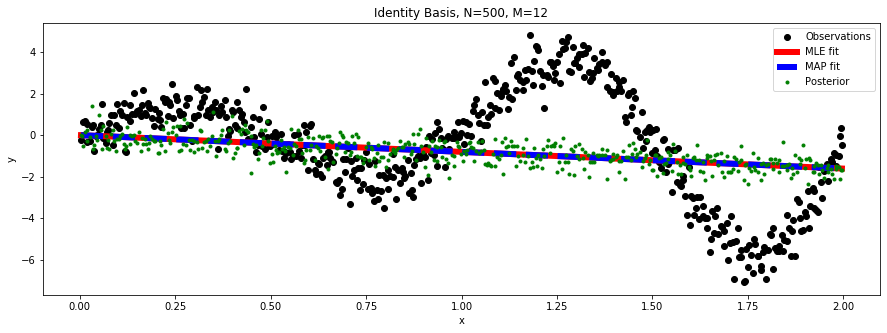

In [46]:
# Identity Basis

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats.distributions import norm
from pyDOE import *
from numpy.linalg import inv

# Generate the list of noisy observations
M = 12
N = 500
x = lhs(1,N)
x = 2*x
eps=np.random.normal(0,np.sqrt(0.5),N)
x=x.flatten()
x.sort()
y=np.exp(x)*np.sin(2*np.pi*x) + eps

# Identity Basis phi(x) = x
alpha = 5
beta=0.1
phi = x
I = np.ones(N)
# calculte w_MLE, w_MAP, f(x) for MLE and MAP, and the posterior for MLE and MAP
a = np.matmul(np.transpose(x),x)
b = (beta/alpha)
c = np.matmul(np.transpose(x),y)
w_mle = a**(-1)*c
w_map = (a+b)**(-1)*c
fx_mle = np.transpose(w_mle)*phi
fx_map = np.transpose(w_map)*phi 
mean_mle = np.transpose(w_mle)*phi
mean_map = np.transpose(w_map)*phi
sigma = (1/alpha)*I
std = np.sqrt(sigma)
posterior_map = np.random.normal(mean_map,std,N)

# Plot for MLE
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(x,y,'ko',label='Observations')
ax.plot(x,fx_mle,'r',lw=6,label='MLE fit')
ax.plot(x,fx_map,'b--',lw=6,label='MAP fit')
ax.plot(x,posterior_map,'g.',label = 'Posterior')
ax.set_title('Identity Basis, N='+str(N)+', M='+str(M))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

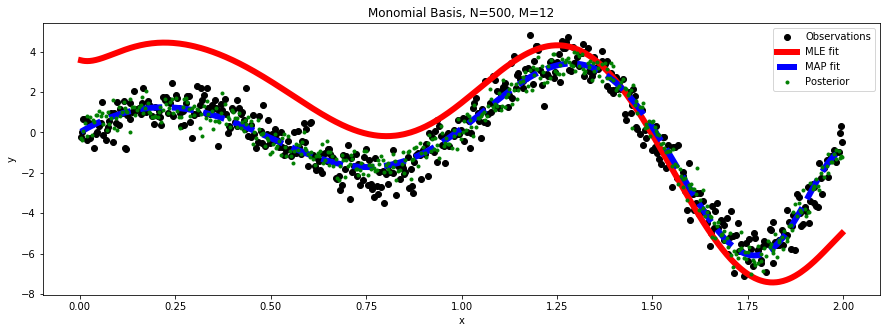

In [47]:
# Monomial Basis

# Set up basis functions
# phi(x) = {1,x,x^2,...x^M} So really the basis set will have size M+1
alpha,beta = 5, 0.1
phi = np.zeros((N,M+1)) #N = 500 rows, M+1 = 9 col's
for i in range(len(x)):
    for j in range(M+1):
        phi[i,j] = x[i]**j                     
I = np.identity(M+1)

##calculte w_MLE, w_MAP, f(x) for MLE and MAP, and the posterior for MLE and MAP
a = np.matmul(np.transpose(phi),phi)
b = (beta/alpha)*I
c = np.matmul(np.transpose(phi),y)
w_mle = np.matmul(inv(a),c)
w_map = np.matmul(inv(a+b),c)
fx_mle = np.zeros(N)
fx_map = np.zeros(N)
for i in range(M+1):
    for j in range(len(x)):
        fx_mle[j] = fx_mle[j]+w_mle[i]*phi[j,i] # f(x) = sum^{M}_{j=1} w_j(x_i) * phi_j(x_i)
        fx_map[j] = fx_map[j]+w_map[i]*phi[j,i]

mean_map = fx_map
I2 = np.identity(N)
sigma = np.sqrt(1/alpha)
for i in range(len(x)):
    posterior_map[i] = np.random.normal(mean_map[i],sigma)

## Plot for MLE
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(x,y,'ko',label='Observations')
ax.plot(x,fx_mle,'r',lw=6,label='MLE fit')
ax.plot(x,fx_map,'b--',lw=6,label='MAP fit')
ax.plot(x,posterior_map,'g.',label = 'Posterior')
ax.set_title('Monomial Basis, N='+str(N)+', M='+str(M))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

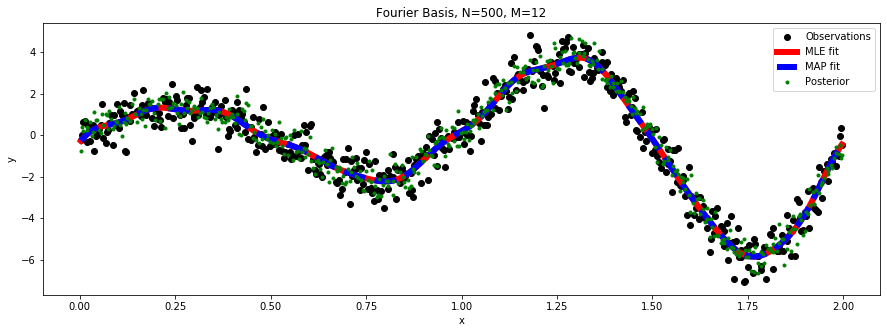

In [48]:
#Fourier Basis

#Set up basis function
# phi(x) = {0,1,sin(pi*x),cos(pi*x),sin(2*pi*x),cos(2*pi*x),...sin(Mπx),cos(M*pi*x*)
phi = np.zeros((N,2*M+1)) #N = 500 rows, 2*M+1 = 17 col's
#not including the first column of phi since it = 0
count=0 #this is the placeholder for the value of M when setting up phi
for i in range(len(x)):
    for j in range(2*M+1):
        if (j==0)|(np.remainder(j,2)==0): #even values of M
            phi[i,j] = np.cos(count*np.pi*x[i])
            count=count+1#after each cos() calculation, increase M by one
        else: # odd values of M
            phi[i,j] = np.sin(count*np.pi*x[i])
    count = 0 #reset M before moving down to the next row
I = np.identity(2*M+1)

#calculte w_MLE, w_MAP, f(x) for MLE and MAP, and the posterior for MLE and MAP
a = np.matmul(np.transpose(phi),phi)
b = (beta/alpha)*I
c = np.matmul(np.transpose(phi),y)
w_mle = np.matmul(inv(a),c)
w_map = np.matmul(inv(a+b),c)
fx_mle = np.zeros(N)
fx_map = np.zeros(N)

for i in range(2*M+1):
    for j in range(len(x)):
        fx_mle[j] = fx_mle[j]+w_mle[i]*phi[j,i] # f(x) = sum^{M}_{j=1} w_j(x_i) * phi_j(x_i)
        fx_map[j] = fx_map[j] + w_map[i]*phi[j,i]

mean_map = fx_map
I2 = np.identity(N)
sigma = np.sqrt(1/alpha)
for i in range(len(x)):
    posterior_map[i] = np.random.normal(mean_map[i],sigma)

# Plot
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(x,y,'ko',label='Observations')
ax.plot(x,fx_mle,'r',lw=6,label='MLE fit')
ax.plot(x,fx_map,'b--',lw=6,label='MAP fit')
ax.plot(x,posterior_map,'g.',label = 'Posterior')
ax.set_title('Fourier Basis, N='+str(N)+', M='+str(M))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



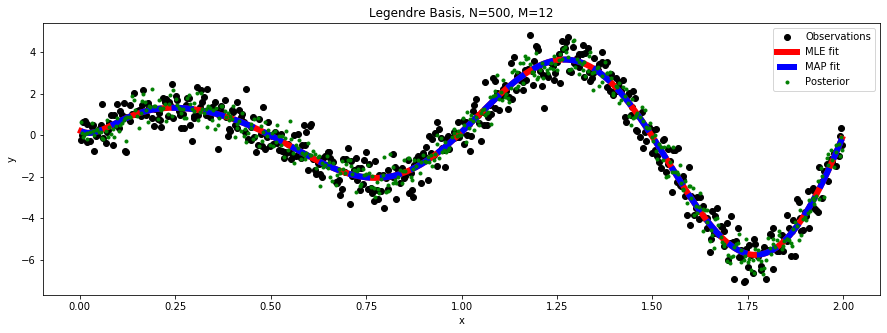

In [49]:
#  Legendre Basis

from scipy.special import legendre

#Set up basis function
# phi(x) = legendre basis
alpha,beta = 5, 0.1
phi = np.zeros((N,M+1)) #N = 500 rows, M+1 = 9 col's
for j in range(M+1):
    Pn = legendre(j)
    dummy=Pn(x-1)
    phi[:,j] = dummy                   
I = np.identity(M+1)

##calculte w_MLE, w_MAP, f(x) for MLE and MAP, and the posterior for MLE and MAP
a = np.matmul(np.transpose(phi),phi)
b = (beta/alpha)*I
c = np.matmul(np.transpose(phi),y)
w_mle = np.matmul(inv(a),c)
w_map = np.matmul(inv(a+b),c)
fx_mle = np.zeros(N)
fx_map = np.zeros(N)

for i in range(M+1):
    for j in range(len(x)):
        fx_mle[j] = fx_mle[j]+w_mle[i]*phi[j,i] # f(x) = sum^{M}_{j=1} w_j(x_i) * phi_j(x_i)
        fx_map[j] = fx_map[j]+w_map[i]*phi[j,i]

mean_map = fx_map
I2 = np.identity(N)
sigma = np.sqrt(1/alpha)
for i in range(len(x)):
    posterior_map[i] = np.random.normal(mean_map[i],sigma)

## Plot for MLE
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(x,y,'ko',label='Observations')
ax.plot(x,fx_mle,'r',lw=6,label='MLE fit')
ax.plot(x,fx_map,'b--',lw=6,label='MAP fit')
ax.plot(x,posterior_map,'g.',label = 'Posterior')
ax.set_title('Legendre Basis, N='+str(N)+', M='+str(M))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()